C:\Users\hongm\anaconda3\envs\ck\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


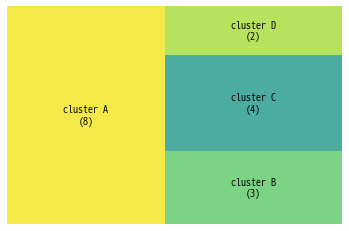

In [2]:
import squarify
import pandas as pd 
import matplotlib.pylab as plt

data = {'customers' : [8,3,4,2],
       'cluster' : ["cluster A", "cluster B", "cluster C", "cluster D"]}

df = pd.DataFrame(data)

#기본 속성 지정
plt.style.use('ggplot')
plt.rc('font', family='D2Coding')

df["label"] = df['cluster'] + "\n(" + df['customers'].astype(str)+")"

squarify.plot(sizes=df['customers'],
             label =df['label'],
             alpha=.8 )

plt.axis('off')
plt.show()

In [ ]:
sns.barplot(x, y, alpha=0.8, palette='YlGnBu')

plt.ylabel('Scores')
plt.title('Subjects')
plt.show()

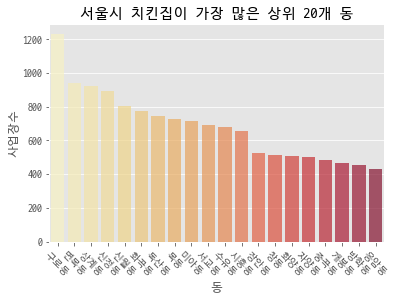

In [164]:

import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("E:/Ella/RStudio/DataAnalysis/프로젝트/치킨집가공.csv", encoding ='utf-8' )

#결측치 제거
df = df.dropna(axis=0)

#결측치 제거 확인 
df.isnull().sum()

#동과 구 분리하기
gu_list = []
dong_list =[]

for add in df['소재지전체주소']:
    
    address_name = add.split(' ', 3)
    gu_name = address_name[1]
    dong_name = address_name[2]
    gu_list.append(gu_name)
    dong_list.append(dong_name)
    
#데이터프레임에 넣기
df['구'] = gu_list
df['동'] = dong_list

#그룹(동)으로 분리
df_count = df.groupby('동')['사업장명'].count()

df_count = pd.DataFrame(df_count)

#이름 변경
df_count.rename(columns={'사업장명' : '사업장수'}, inplace= True)

#상위 20개 치킨집 가장 많은 동 분리
df_count = df_count.sort_values(by=['사업장수'], ascending = False)
top_20=df_count.head(20)
top_20

#시각화

ax = sns.barplot(top_20.index, top_20['사업장수'], alpha=0.7, palette='YlOrRd', data= top_20)
plt.xticks(rotation = - 45 )
plt.title('서울시 치킨집이 가장 많은 상위 20개 동')
plt.show()

In [134]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31745 entries, 0 to 31744
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지전체주소  31730 non-null  object
 1   사업장명     31745 non-null  object
dtypes: object(2)
memory usage: 496.1+ KB


In [79]:
df.isnull().sum()

소재지전체주소    15
사업장명        0
dtype: int64

In [48]:
df['소재지전체주소'][0].split(' ')

['서울특별시', '종로구', '중학동', '14번지', '트윈트리', 'A동', 'B202호', '']

In [135]:
df = df.dropna(axis=0)

In [136]:
df.isnull().sum()

소재지전체주소    0
사업장명       0
dtype: int64

In [58]:
df = df.dropna(how='all')



In [137]:
print(df)

                                  소재지전체주소            사업장명
0       서울특별시 종로구 중학동 14번지 트윈트리 A동 B202호   에디스 비(eddys B)
1            서울특별시 종로구 부암동 208-39번지 (1층)     부암동주식(부암동酒食)
2              서울특별시 종로구 통의동 67-2번지 (2층)              홍탁촌
3            서울특별시 종로구 창신동 583-19번지 (1층)             썬더치킨
4              서울특별시 종로구 효제동 65-2번지 지상2층           만남의 광장
...                                   ...             ...
31740  서울특별시 영등포구 영등포동 618-36번지 지상1층(일부)               술보
31741             서울특별시 영등포구 신길동 829-0번지            미라미호프
31742            서울특별시 영등포구 대림동 861-10번지              폭포수
31743            서울특별시 영등포구 대림동 778-42번지            호프하우스
31744            서울특별시 영등포구 도림동 183-18번지             꼬꼬치킨

[31730 rows x 2 columns]


In [26]:
title="서울특별시 종로구 중학동 14번지 트윈트리 A동 B202호"
info=title.split(' ', 3)
info[3]
print(info[2])

# df.info()

중학동


In [138]:
gu_list = []
dong_list =[]

for add in df['소재지전체주소']:
#     print(add)
#     print(type(add))
    address_name = add.split(' ', 3)
    gu_name = address_name[1]
    dong_name = address_name[2]
    gu_list.append(gu_name)
    dong_list.append(dong_name)

In [140]:
df['구'] = gu_list
df['동'] = dong_list


C:\Users\hongm\anaconda3\envs\ck\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\hongm\anaconda3\envs\ck\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
df

,소재지전체주소,사업장명,구,동
0,서울특별시 종로구 중학동 14번지 트윈트리 A동 B202호,에디스 비(eddys B),종로구,중학동
1,서울특별시 종로구 부암동 208-39번지 (1층),부암동주식(부암동酒食),종로구,부암동
2,서울특별시 종로구 통의동 67-2번지 (2층),홍탁촌,종로구,통의동
3,서울특별시 종로구 창신동 583-19번지 (1층),썬더치킨,종로구,창신동
4,서울특별시 종로구 효제동 65-2번지 지상2층,만남의 광장,종로구,효제동
...,...,...,...,...
31740,서울특별시 영등포구 영등포동 618-36번지 지상1층(일부),술보,영등포구,영등포동
31741,서울특별시 영등포구 신길동 829-0번지,미라미호프,영등포구,신길동
31742,서울특별시 영등포구 대림동 861-10번지,폭포수,영등포구,대림동
31743,서울특별시 영등포구 대림동 778-42번지,호프하우스,영등포구,대림동


In [128]:
groupby_dong = df.groupby('동')


In [142]:
df_count = df.groupby('동')['사업장명'].count()

In [143]:
df_count = pd.DataFrame(df_count)
df_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 544-7번지 to 흥인동
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   사업장명    366 non-null    int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [144]:

df_count.rename(columns={'사업장명' : '사업장수'}, inplace= True)

print(df_count)
 


         사업장수
동            
544-7번지     1
가리봉동      213
가산동       278
가양동        62
가회동         1
...       ...
효제동        13
효창동        11
후암동        36
휘경동        99
흥인동         6

[366 rows x 1 columns]


In [147]:
df_count = df_count.sort_values(by=['사업장수'], ascending = False)
top_20=df_count.head(20)
top_20

,사업장수
동,
구로동,1230
면목동,939
상계동,925
신정동,896
신월동,806
화곡동,773
독산동,746
목동,730
미아동,718


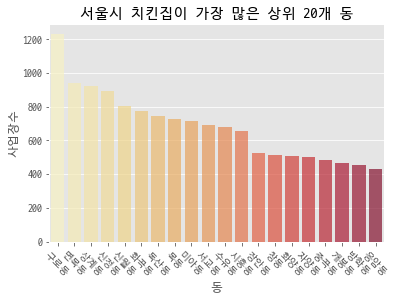

In [162]:
import seaborn as sns

ax = sns.barplot(top_20.index, top_20['사업장수'], alpha=0.7, palette='YlOrRd', data= top_20)
plt.xticks(rotation = - 45 )
plt.title('서울시 치킨집이 가장 많은 상위 20개 동')
plt.show()